# Demo: Phase transition

In [25]:
from fastsir import AnnealedContinuousSIR as sir
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [116]:
#Network parameters
N = 10000000
degree = 20
max_degree = degree

In [117]:
#contagion parameters
r = 1 #recovery rate
recovery_rate = r
alpha = 2.1
infection_func = lambda q,k: q*k**alpha
q = 1.05*recovery_rate/degree

In [118]:
alpha_crit = lambda R0,k: 1 + np.log2((1/(R0-1)+k)/(k-1))
alpha_crit(1.05,20)

2.0740005814437765

In [119]:
#simulation parameters
period = np.inf #simulate until no infected node
nb_sample = 10

### Simulation

In [120]:
Ilist = []
tlist = []
#define process object for each q
infection_rate = infection_func(q,np.arange(max_degree+1))
process = sir(N,degree,recovery_rate,infection_rate)
#get sample
while len(Ilist) < nb_sample:
    initial_infected_nodes = {np.random.randint(N)}
    process.infect_node_set(initial_infected_nodes)
    process.evolve(period,save_transmission_tree=False,save_macro_state=True) #we do not need to save these
    I = np.array(process.get_macro_state_vector())[:,2] #get number of infectious
    t = np.array(process.get_macro_state_vector())[:,0]
    R = process.get_current_macro_state()[3]
    if R/N > 0.01:
        Ilist.append(I)
        tlist.append(t)
    process.reset()

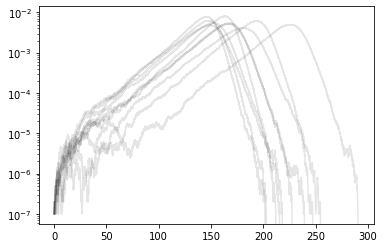

In [121]:
for j in range(len(Ilist)):
    plt.semilogy(tlist[j],Ilist[j]/N, color='k', alpha=0.1)